<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB_week6_2_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**09.분류 실습- 캐글 산탄데르 고객 만족 예측**



In [17]:
!pip install xgboost==1.7.6

!pip install lightgbm==4.1.0

In [44]:
#데이터 전처리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

cust_df= pd.read_csv('/content/train_santander.csv',encoding='latin-1')
print('dataset shape:',cust_df.shape)
cust_df.head(3)


dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
#전체 데이터에서 만족 0, 불만족 1 비율 살펴보기
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt= cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt= cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [6]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


* var3 칼럼의 min이 -999999 이다. -> 값이 많은 2로 변환
* ID피처는 드롭

In [7]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

#피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features= cust_df.iloc[:,:-1]
y_labels= cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X_features,y_labels,test_size=0.2,random_state=0)
train_cnt= y_train.count()
test_cnt= y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape,X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [9]:
#X_train, y_train을 다시 학습과 검증 데이터 세트로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train,y_train,test_size=0.1,random_state=0)

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf= XGBClassifier(n_estimators=500,random_state=156)

# 성능 평가 지표를 auc로 조기 중단 파라미터는 100으로 설정하고 학습수행
xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=100,eval_metric='auc',eval_set=[(X_tr,y_tr),(X_val,y_val)])

xgb_roc_score= roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82058	validation_1-auc:0.81873
[1]	validation_0-auc:0.82880	validation_1-auc:0.82590
[2]	validation_0-auc:0.83468	validation_1-auc:0.82624
[3]	validation_0-auc:0.84451	validation_1-auc:0.83124
[4]	validation_0-auc:0.84772	validation_1-auc:0.83065
[5]	validation_0-auc:0.85204	validation_1-auc:0.83414
[6]	validation_0-auc:0.85646	validation_1-auc:0.83321
[7]	validation_0-auc:0.86026	validation_1-auc:0.83593
[8]	validation_0-auc:0.86132	validation_1-auc:0.83587
[9]	validation_0-auc:0.86462	validation_1-auc:0.83781
[10]	validation_0-auc:0.86842	validation_1-auc:0.84063
[11]	validation_0-auc:0.87262	validation_1-auc:0.84212
[12]	validation_0-auc:0.87648	validation_1-auc:0.84374
[13]	validation_0-auc:0.87900	validation_1-auc:0.84203
[14]	validation_0-auc:0.88162	validation_1-auc:0.84137
[15]	validation_0-auc:0.88370	validation_1-auc:0.84040
[16]	validation_0-auc:0.88500	validation_1-auc:0.83990
[17]	validation_0-auc:0.88718	validation_1-auc:0.83917
[18]	validation_0-au

In [11]:
from hyperopt import hp

#max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
#colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색

xgb_search_space= {'max_depth': hp.quniform('max_depth',5,15,1),
                   'min_child_weight':hp.quniform('min_child_weight',1,6,1),
                   'colsample_bytree':hp.uniform('colsample_bytree',0.5,0.95),
                   'learning_rate': hp.uniform('learning_rate',0.01,0.2)}

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(
        n_estimators=100,
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        colsample_bytree=search_space['colsample_bytree'],
        learning_rate=search_space['learning_rate']
    )

    roc_auc_list = []
    kf = KFold(n_splits=3)

    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        xgb_clf.fit(
            X_tr, y_tr,
            early_stopping_rounds=30,
            eval_metric="auc",
            eval_set=[(X_tr, y_tr), (X_val, y_val)]
        )

        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)


In [13]:
from hyperopt import fmin, tpe, Trials
import numpy as np

trials = Trials()

best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=30)
)

print('best:', best)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[19]	validation_0-auc:0.89845	validation_1-auc:0.82624
[20]	validation_0-auc:0.90086	validation_1-auc:0.82793
[21]	validation_0-auc:0.90190	validation_1-auc:0.82629
[22]	validation_0-auc:0.90439	validation_1-auc:0.82729
[23]	validation_0-auc:0.90507	validation_1-auc:0.82820
[24]	validation_0-auc:0.90590	validation_1-auc:0.82771
[25]	validation_0-auc:0.90669	validation_1-auc:0.82847
[26]	validation_0-auc:0.90836	validation_1-auc:0.82965
[27]	validation_0-auc:0.90970	validation_1-auc:0.82947
[28]	validation_0-auc:0.91131	validation_1-auc:0.83014
[29]	validation_0-auc:0.91183	validation_1-auc:0.83063
[30]	validation_0-auc:0.91203	validation_1-auc:0.83035
[31]	validation_0-auc:0.91254	validation_1-auc:0.83014
[32]	validation_0-auc:0.91333	validation_1-auc:0.82944
[33]	validation_0-auc:0.91352	validation_1-auc:0.82935
[34]	validation_0-auc:0.91388	validation_1-auc:0.82896
[35]	validation_0-auc:0.91421	validation_1-auc:0.82882
[36]	validation_0-auc:0.91417

In [14]:
xgb_clf = XGBClassifier(
    n_estimators=500,
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    colsample_bytree=round(best['colsample_bytree'], 5)
)

xgb_clf.fit(
    X_tr, y_tr,
    early_stopping_rounds=100,
    eval_metric="auc",
    eval_set=[(X_tr, y_tr), (X_val, y_val)]
)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))


[0]	validation_0-auc:0.81701	validation_1-auc:0.81732
[1]	validation_0-auc:0.81367	validation_1-auc:0.80153
[2]	validation_0-auc:0.82607	validation_1-auc:0.81629
[3]	validation_0-auc:0.83190	validation_1-auc:0.82448
[4]	validation_0-auc:0.83338	validation_1-auc:0.82803
[5]	validation_0-auc:0.83293	validation_1-auc:0.82323
[6]	validation_0-auc:0.83074	validation_1-auc:0.81871
[7]	validation_0-auc:0.83423	validation_1-auc:0.82264
[8]	validation_0-auc:0.83718	validation_1-auc:0.82593
[9]	validation_0-auc:0.83639	validation_1-auc:0.82314
[10]	validation_0-auc:0.83365	validation_1-auc:0.81931
[11]	validation_0-auc:0.83686	validation_1-auc:0.82374
[12]	validation_0-auc:0.83947	validation_1-auc:0.82572
[13]	validation_0-auc:0.83790	validation_1-auc:0.82117
[14]	validation_0-auc:0.83977	validation_1-auc:0.82284
[15]	validation_0-auc:0.83832	validation_1-auc:0.82046
[16]	validation_0-auc:0.83674	validation_1-auc:0.81826
[17]	validation_0-auc:0.83557	validation_1-auc:0.81388
[18]	validation_0-au

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)


In [20]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm_clf = LGBMClassifier(n_estimators=500)
eval_set = [(X_tr, y_tr), (X_val, y_val)]

from lightgbm import early_stopping, log_evaluation

lgbm_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_tr, y_tr), (X_val, y_val)],
    eval_metric='auc',
    callbacks=[early_stopping(stopping_rounds=100), log_evaluation(50)]
)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[LightGBM] [Info] Number of positive: 2121, number of negative: 52613
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.104071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14060
[LightGBM] [Info] Number of data points in the train set: 54734, number of used features: 251
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038751 -> initscore=-3.211076
[LightGBM] [Info] Start training from score -3.211076
Training until validation scores don't improve for 100 rounds
[50]	training's auc: 0.907201	training's binary_logloss: 0.113069	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.140219
[100]	training's auc: 0.927935	training's binary_logloss: 0.103465	valid_1's auc: 0.832461	valid_1's binary_logloss: 0.141603
Early stopping, best iteration is:
[34]	training's auc: 0.893265	training's binary_logloss: 0.118209	valid_1's auc: 0.84314	vali

In [21]:
from hyperopt import hp

lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 100, 160, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}


In [24]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

def objective_func(search_space):
    lgbm_clf = LGBMClassifier(
        n_estimators=100,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate']
    )

    roc_auc_list = []
    kf = KFold(n_splits=3)

    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        lgbm_clf.fit(
            X_tr, y_tr,
            callbacks=[early_stopping(stopping_rounds=100), log_evaluation(50)],
            eval_metric="auc",
            eval_set=[(X_tr, y_tr), (X_val, y_val)]
        )

        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)


In [25]:
from hyperopt import fmin, tpe, Trials
import numpy as np

trials = Trials()

best = fmin(
    fn=objective_func,
    space=lgbm_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=30)
)

print('best:', best)


[LightGBM] [Info] Number of positive: 1579, number of negative: 38965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12827
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872
[LightGBM] [Info] Start training from score -3.205872
Training until validation scores don't improve for 100 rounds
[50]	training's auc: 0.869341	training's binary_logloss: 0.130003	valid_1's auc: 0.828544	valid_1's binary_logloss: 0.138887
[100]	training's auc: 0.888166	training's binary_logloss: 0.121575	valid_1's auc: 0.83126	valid_1's binary_logloss: 0.135856
Did not meet early stopping. Best iteration is:
[98]	training's auc: 0.88765	training's binary_logloss: 0.121808	valid_1's auc: 0

In [27]:
lgbm_clf = LGBMClassifier(
    n_estimators=500,
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=round(best['subsample'], 5),
    learning_rate=round(best['learning_rate'], 5)
)

lgbm_clf.fit(
    X_tr, y_tr,
    callbacks=[early_stopping(stopping_rounds=100), log_evaluation(50)],
    eval_metric="auc",
    eval_set=[(X_tr, y_tr), (X_val, y_val)]
)


lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[LightGBM] [Info] Number of positive: 2121, number of negative: 52613
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.179889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13823
[LightGBM] [Info] Number of data points in the train set: 54734, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038751 -> initscore=-3.211076
[LightGBM] [Info] Start training from score -3.211076
Training until validation scores don't improve for 100 rounds
[50]	training's auc: 0.89073	training's binary_logloss: 0.119443	valid_1's auc: 0.842788	valid_1's binary_logloss: 0.139581
[100]	training's auc: 0.914449	training's binary_logloss: 0.110716	valid_1's auc: 0.842998	valid_1's binary_logloss: 0.1393
[150]	training's auc: 0.927485	training's binary_logloss: 0.104429	valid_1's auc: 0.840066	valid_1's binary_logloss: 0.140014
Early

**언더 샘플링과 오버 샘플링의 이해**
- 언더 샘플링 : 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식
- 오버 샘플링 : 이상 데이터와 같이 적은 데이터 세트를 증식-> 학습을 위한 충분한 데이터 확보
  - SMOTE 방법 : synthetic minority over-sampling technique - 개별 데이터들의 K 최근접 이웃을 찾아 데이터와 이웃들의 차이를 일정값으로 만들어 새로운 데이터 생성
  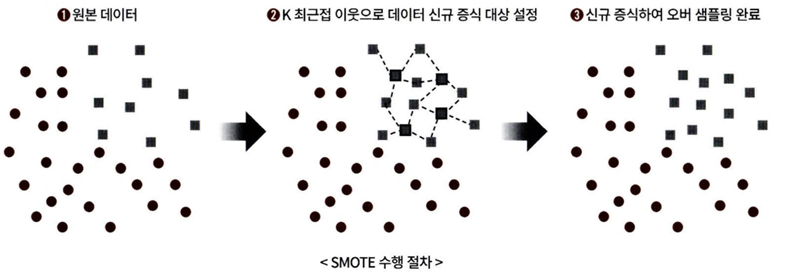

In [28]:
#데이터 일차 가공 및 모델 학습/예측/평가
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
card_df = pd.read_csv('/content/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [29]:
from sklearn.model_selection import train_test_split

# 입력받은 DataFrame을 복사한 뒤 'Time' 칼럼 삭제 후 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy


In [30]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    # 데이터 전처리 수행
    df_copy = get_preprocessed_df(df)

    # 마지막 칼럼을 레이블로, 나머지는 피처로 분리
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]

    # Stratified 기반으로 학습/테스트 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, y_target, test_size=0.3, random_state=0, stratify=y_target
    )

    return X_train, X_test, y_train, y_test

# 예시 사용
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('학습 데이터 레이블 비율')
print(y_train.value_counts() / y_train.shape[0] * 100)
print('테스트 데이터 레이블 비율')
print(y_test.value_counts() / y_test.shape[0] * 100)


학습 데이터 레이블 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [31]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):

  confusion = confusion_matrix(y_test, pred)

  accuracy = accuracy_score(y_test , pred)

  precision = precision_score(y_test , pred)

  recall = recall_score(y_test , pred)

  f1 = f1_score(y_test,pred)

  # ROC-AUC 추가

  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차 행렬')

  print(confusion)

  # ROC-AUC print 추가

  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1： {3:.4f}, AUC：{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

# 예측 및 확률값
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# get_clf_eval() 함수를 이용해 평가 수행
get_clf_eval(y_test, lr_pred, lr_pred_proba)


오차 행렬
[[85281    14]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8667, 재현율: 0.6149, F1： 0.7194, AUC：0.9741


In [32]:
# Estimator 객체와 데이터 세트를 입력받아 학습, 예측, 평가 수행
def get_model_train_eval(model, ftr_train, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)


In [33]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=1000,
    num_leaves=64,
    n_jobs=-1,
    boost_from_average=False
)

get_model_train_eval(
    lgbm_clf,
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test
)


[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

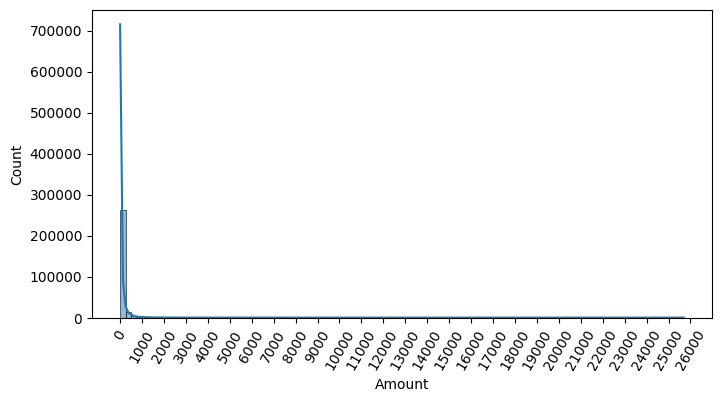

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler

# StandardScaler를 이용해 Amount를 정규 분포 형태로 변환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))

    # 변환된 Amount를 Amount_Scaled로 변경 후 맨 앞 칼럼으로 추가
    df_copy.insert(0, 'Amount_Scaled', amount_n)

    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy


In [36]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(
    lr_clf,
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test
)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(
    n_estimators=1000,
    num_leaves=64,
    n_jobs=-1,
    boost_from_average=False
)
get_model_train_eval(
    lgbm_clf,
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test
)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284, F1： 0.7294, AUC：0.9706
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [37]:
import numpy as np

def get_preprocessed_df(df=None):
    df_copy = df.copy()

    # Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)

    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, F1： 0.7120, AUC：0.9734
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.158977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

**이상치 데이터 제거 후 모델 학습/예측/평가**
- IQR 방식 : 1,3분위수에 1.5 곱해서 최솟값, 최댓값으로 지정하기

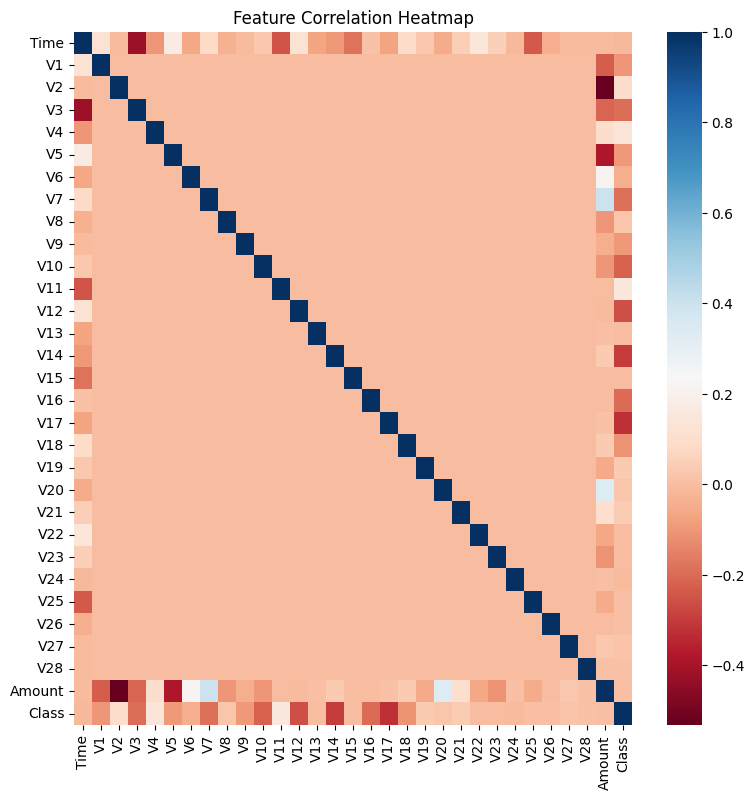

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 시각화
plt.figure(figsize=(9, 9))
corr = card_df.corr()

# cmap='RdBu' : 양의 상관관계(파란색), 음의 상관관계(빨간색)
sns.heatmap(corr, cmap='RdBu')

plt.title("Feature Correlation Heatmap")
plt.show()


In [39]:
import numpy as np

# 특정 컬럼(column)에 대한 이상치 인덱스를 반환하는 함수
def get_outlier(df=None, column=None, weight=1.5):
    # 1. 'Class'가 1 (즉, 사기 거래)에 해당하는 행만 추출
    fraud = df[df['Class'] == 1][column]

    # 2. 1사분위(Q1), 3사분위(Q3) 계산
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    # 3. IQR 계산 및 하한/상한 설정
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    # 4. 이상치 인덱스 추출
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

# V14 컬럼의 이상치 인덱스 추출
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)


이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [40]:
# 로그 변환 + 이상치 제거를 포함한 전처리 함수
def get_preprocessed_df(df=None):
    df_copy = df.copy()

    # Amount 컬럼 로그 변환 후 맨 앞에 추가
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)

    # 기존 Time, Amount 컬럼 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

    # V14의 이상치 제거
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)

    return df_copy

# 전처리 + 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print("### LightGBM 예측 성능 ###")
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712, F1： 0.7568, AUC：0.9725
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [41]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# SMOTE를 적용하여 불균형 데이터 보정
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("SMOTE 적용 전:", X_train.shape, y_train.shape)
print("SMOTE 적용 후:", X_train_over.shape, y_train_over.shape)
print("SMOTE 적용 후 레이블 값 분포:\n", pd.Series(y_train_over).value_counts())


SMOTE 적용 전: (199362, 29) (199362,)
SMOTE 적용 후: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포:
 Class
0    199020
1    199020
Name: count, dtype: int64


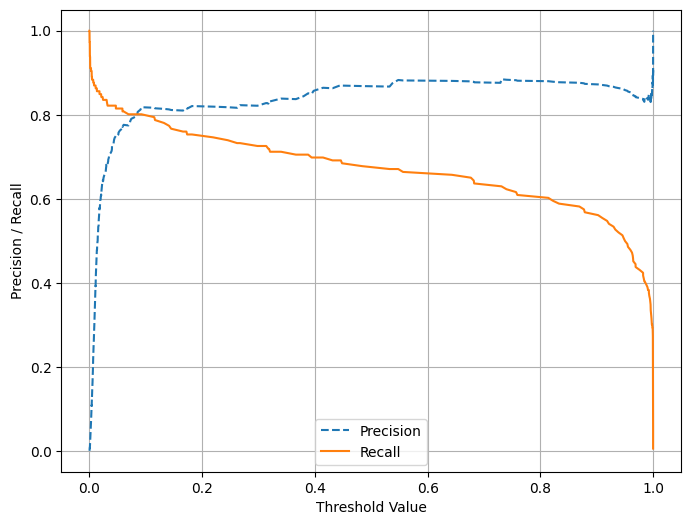

In [42]:
# Precision-Recall 곡선 시각화
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='Precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='Recall')

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision / Recall')
    plt.legend()
    plt.grid()
    plt.show()

# 로지스틱 회귀 모델 기준 Precision-Recall 곡선
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])


In [45]:
from lightgbm import LGBMClassifier

# SMOTE 데이터로 LightGBM 학습 및 평가
lgbm_clf = LGBMClassifier(
    n_estimators=1000,
    num_leaves=64,
    n_jobs=-1,
    boost_from_average=False
)

get_model_train_eval(
    lgbm_clf,
    ftr_train=X_train_over,
    ftr_test=X_test,
    tgt_train=y_train_over,
    tgt_test=y_test
)


[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.126121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split